In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import tsfel
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Retina mode
from latexify import latexify, format_axes
from MakeDataset import X_train, X_test, y_train, y_test

In [4]:
import warnings
# Suppressing all FutureWarnings and UserWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [5]:
# Printing versions of libraries used
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn,scikit-learn,tsfel

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.18.1

numpy       : 1.26.2
pandas      : 2.1.3
matplotlib  : 3.8.2
seaborn     : 0.13.2
scikit-learn: 1.5.1
tsfel       : 0.1.7



## Note:
#### Activity labels
1 WALKING <br>
2 WALKING_UPSTAIRS <br>
3 WALKING_DOWNSTAIRS <br>
4 SITTING <br>
5 STANDING <br>
6 LAYING <br>

This is how the train data looks like :

In [4]:
X_train

array([[[ 1.19648   , -0.1606898 , -0.740178  ],
        [ 1.22203   , -0.2672951 , -0.7717485 ],
        [ 1.22311   , -0.4338634 , -0.7678422 ],
        ...,
        [ 0.4974957 , -0.2795907 , -0.2029592 ],
        [ 0.5064167 , -0.286091  , -0.2564634 ],
        [ 0.5609918 , -0.302237  , -0.2553743 ]],

       [[ 0.253887  ,  0.6446213 ,  0.7305601 ],
        [ 0.2547409 ,  0.6470096 ,  0.7330282 ],
        [ 0.256914  ,  0.6468081 ,  0.7354798 ],
        ...,
        [ 0.2489302 ,  0.642803  ,  0.7323693 ],
        [ 0.2503708 ,  0.6447095 ,  0.7369245 ],
        [ 0.2513104 ,  0.6440663 ,  0.735841  ]],

       [[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       ...,

       [[ 0.1943966 ,  0.5317094 ,  0.834933  ],
        [ 0

In [5]:
y_train

array([2, 6, 5, 2, 2, 2, 1, 1, 5, 4, 1, 4, 1, 1, 6, 2, 3, 1, 1, 4, 3, 3,
       5, 6, 5, 1, 3, 6, 4, 5, 5, 2, 5, 1, 1, 6, 4, 3, 3, 3, 3, 4, 6, 3,
       4, 1, 2, 2, 6, 5, 5, 3, 6, 6, 4, 3, 4, 2, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 5, 3, 4, 3, 1, 4, 4, 3, 1, 5, 2, 3, 6, 1, 4, 2, 2, 5, 2, 1, 3,
       6, 6, 2, 5, 6, 1, 3, 5, 2, 3, 4, 4, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       3, 6, 5, 4, 2, 2, 6, 2, 6, 6, 3, 1, 4, 6, 2, 2])

In [6]:
print("X_train is a 3-D numpy array of shape:",X_train.shape)
print("y_train are the activity labels associated with each sample in X_train. Its shape is:",y_train.shape)

X_train is a 3-D numpy array of shape: (126, 500, 3)
y_train are the activity labels associated with each sample in X_train. Its shape is: (126,)


# Question 1
#### Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]



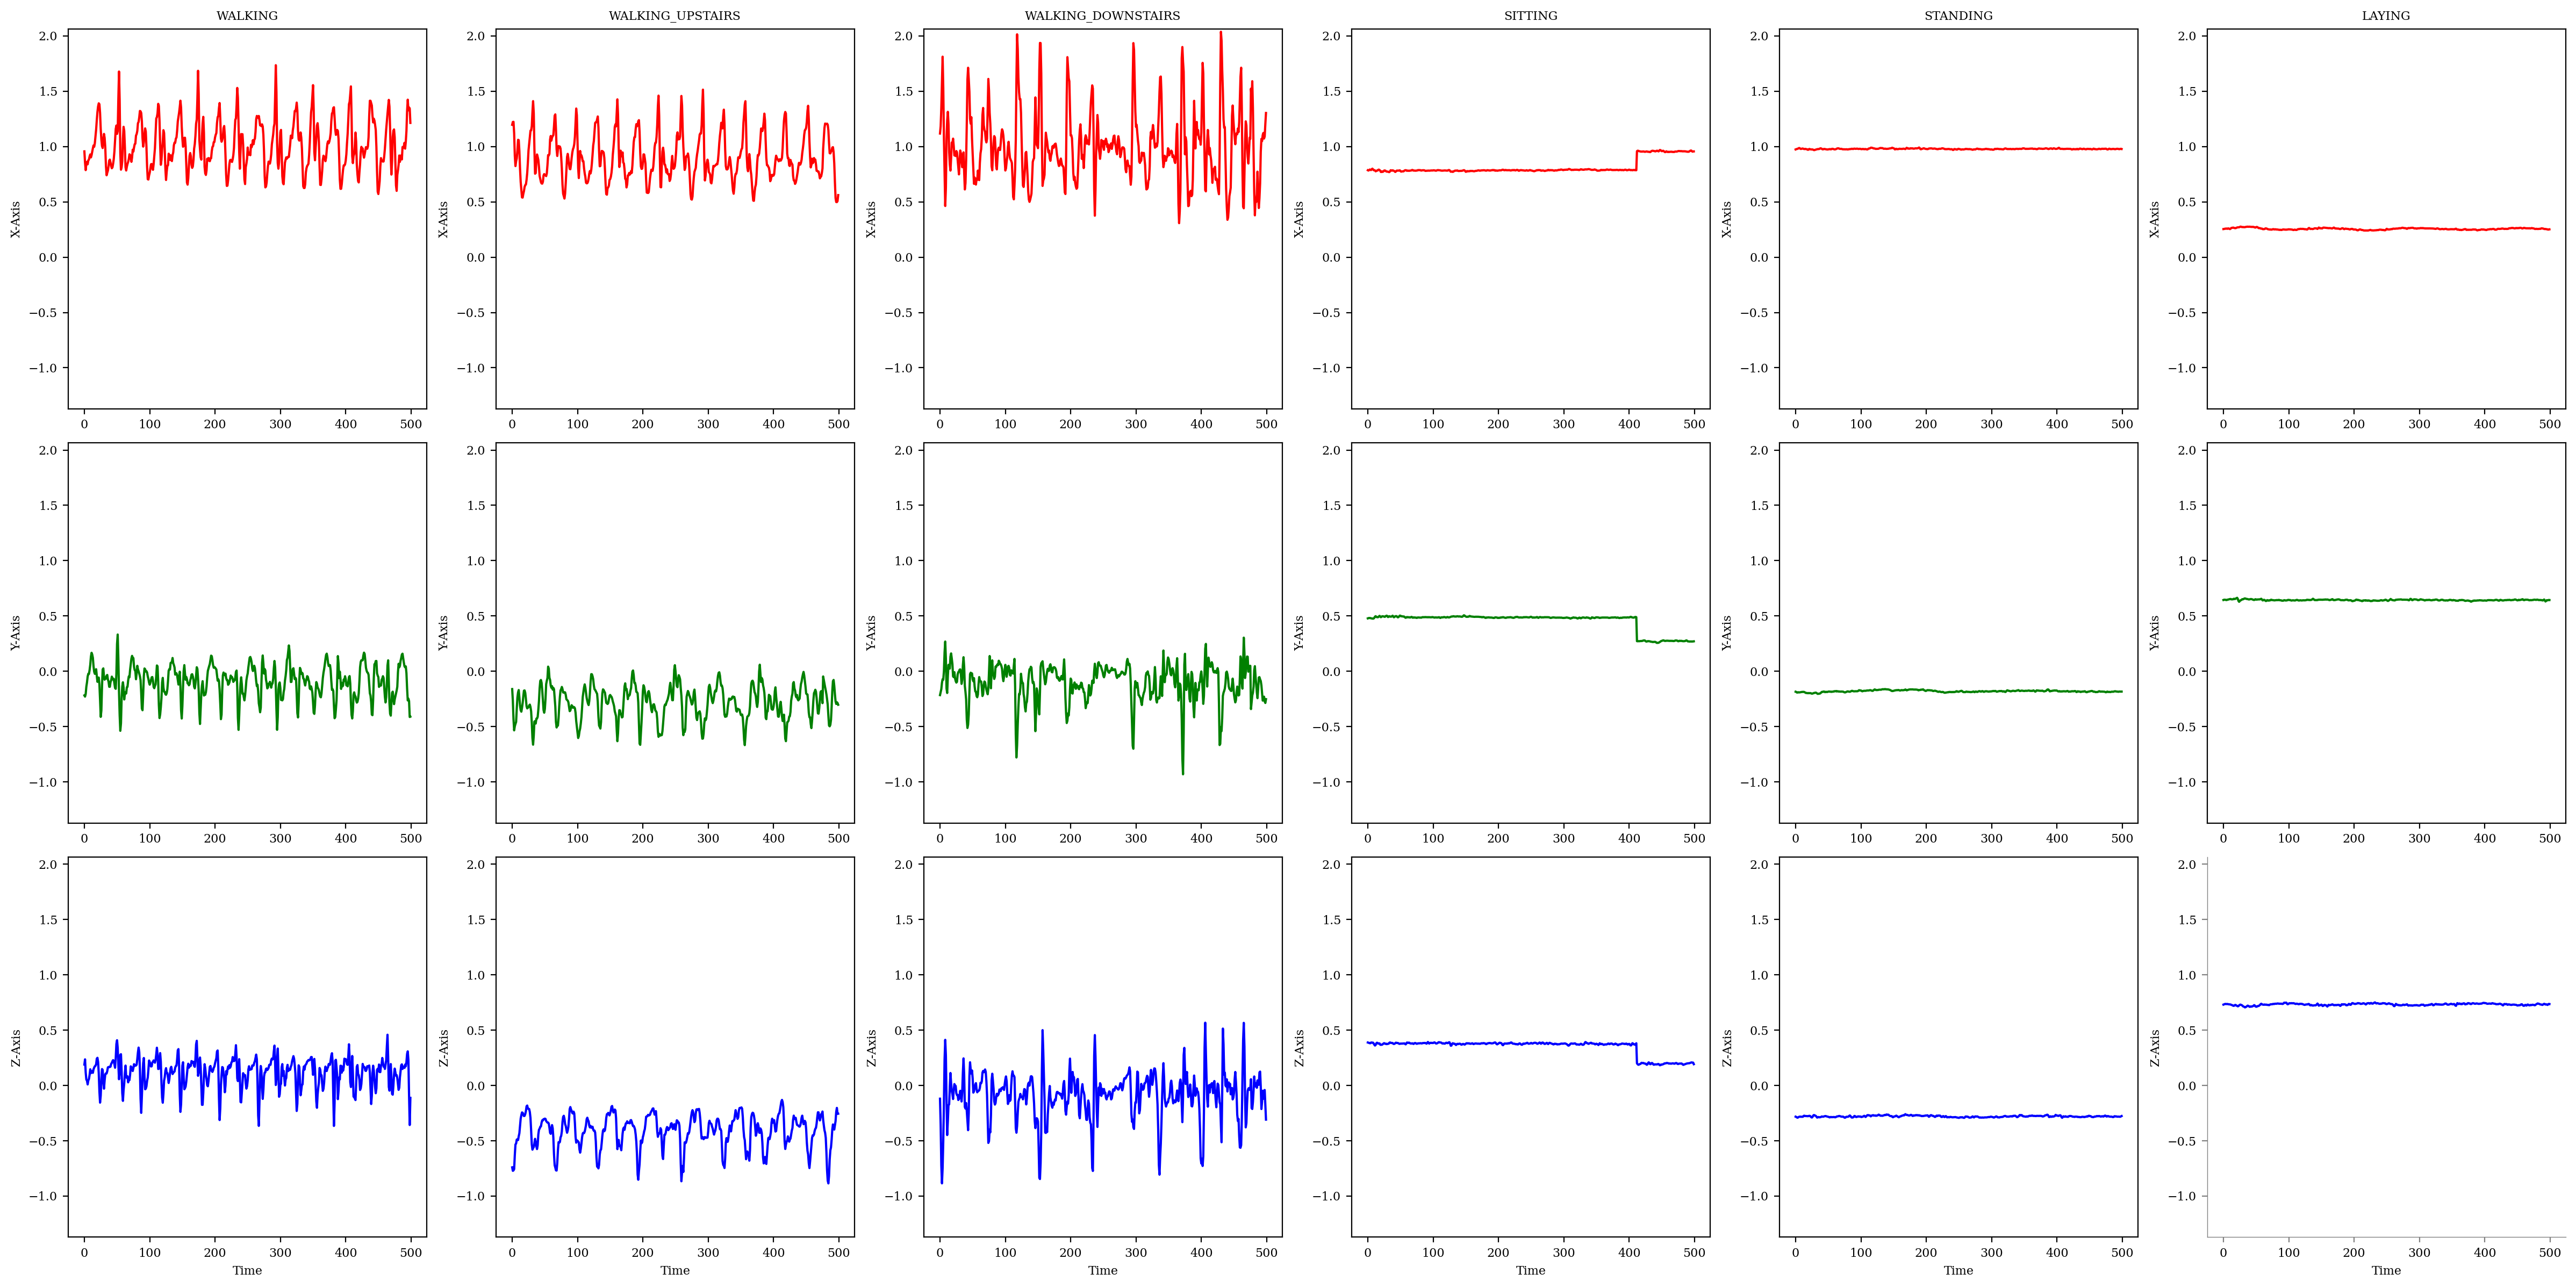

In [7]:
activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
num_classes = 6

# Calculate the global min and max for setting the y-axis limits
min_val = np.min(X_train[:, :, :3])  # Only considering the first three columns (Acc_x, Acc_y, Acc_z)
max_val = np.max(X_train[:, :, :3])

latexify()
fig, axes = plt.subplots(3, num_classes, figsize=(24, 12))
format_axes(plt.gca())
for i in range(num_classes):
    # Finding the first occurrence of the class in y_train
    class_idx = np.where(y_train == i + 1)[0][0]
    
    # Plotting X-axis data in the first row
    axes[0, i].plot(X_train[class_idx][:, 0], label='Acc_x', color='r')
    axes[0, i].set_title(activities[i])
    axes[0, i].set_ylabel('X-Axis')
    axes[0, i].set_ylim([min_val, max_val])  # Set uniform y-axis limits
    
    # Plotting Y-axis data in the second row
    axes[1, i].plot(X_train[class_idx][:, 1], label='Acc_y', color='g')
    axes[1, i].set_ylabel('Y-Axis')
    axes[1, i].set_ylim([min_val, max_val])  # Set uniform y-axis limits
    
    # Plotting Z-axis data in the third row
    axes[2, i].plot(X_train[class_idx][:, 2], label='Acc_z', color='b')
    axes[2, i].set_ylabel('Z-Axis')
    axes[2, i].set_xlabel('Time')
    axes[2, i].set_ylim([min_val, max_val])  # Set uniform y-axis limits

plt.tight_layout()
plt.show()

### 1. Differences/Similarities Between Activities:

1. **Dynamic Activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS):**
   - These activities show distinct periodic patterns in the accelerometer data across all three axes (X, Y, and Z).
   - The magnitude and frequency of the oscillations vary slightly depending on the type of walking activity. For example, "WALKING_DOWNSTAIRS" has more pronounced variations compared to "WALKING" or "WALKING_UPSTAIRS".
   - These patterns are consistent with the repetitive motion involved in walking.

2. **Static Activities (SITTING, STANDING, LAYING):**
   - The accelerometer data for these activities show very little variation, which is expected since these activities involve minimal movement.
   - The signals remain almost constant across all axes, with slight noise or minor changes possibly due to minor adjustments in posture or breathing.
   - The differences between these static activities are subtle but could be distinguished based on the small variations in the acceleration values.

### 2. Can the Model Classify the Activities Based on the Data?

Yes, the model should be able to classify the activities based on the data.
The dynamic activities show clear and distinct patterns, making them easier to distinguish from each other and from static activities.
The static activities have more subtle differences, but the consistency within each class should allow the model to identify and differentiate them.

# Question 2
#### Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration ${acc}_x^2 + {acc}_y^2 + {acc}_z^2$ for each activity and justify your answer. [0.5 marks]
answer. [0.5 marks]


As far as we have to distinguish between static and dynamic activities, I don't think we need a machine learning model to do so. Its because it is clear from the waveforms of the triaxial accelerations. If a waveform is varying too much in a certain period of time, we can infer that the person is most probably performing any sort of dynamic activity (walking or climbing up/down the stairs), and on the other hand, if the wave form is pretty much stable and remains relatively consistent, we can easily infer that the person is performing some static activities (laying, sitting or standing).
Even if data is too large, provided we have sufficient workforce, we can predict the nature of activity performed even on large datasets.

Justification of above estimation:

In [8]:
# Linear Acceleration calculation for each time step
linear_acc = np.sqrt(np.sum(np.square(X_train), axis=2))

In [9]:
activity_features = {} # Dictionary to store features built on linear acceleration of each activity

# fetching unique features
activities = np.unique(y_train)

for activity in activities:
    activity_samples = linear_acc[y_train == activity]  # All samples for the current activity
    
    mean_acc = np.mean(activity_samples)
    var_acc = np.var(activity_samples)
    std_acc = np.std(activity_samples)
    max_acc = np.max(activity_samples)
    min_acc = np.min(activity_samples)
    range_acc = max_acc - min_acc
    
    activity_features[activity] = {
        'Mean': mean_acc,
        'Variance': var_acc,
        'Standard Deviation': std_acc,
        'Max': max_acc,
        'Min': min_acc,
        'Range': range_acc
    }

# Printing the features for each activity
for activity, features in activity_features.items():
    print(f"Activity {activity}:")
    for feature_name, value in features.items():
        print(f"  {feature_name}: {value:.5f}")


Activity 1:
  Mean: 1.05068
  Variance: 0.04843
  Standard Deviation: 0.22007
  Max: 1.97209
  Min: 0.46239
  Range: 1.50971
Activity 2:
  Mean: 1.04486
  Variance: 0.06956
  Standard Deviation: 0.26374
  Max: 2.04502
  Min: 0.31691
  Range: 1.72811
Activity 3:
  Mean: 1.04409
  Variance: 0.13066
  Standard Deviation: 0.36148
  Max: 2.38965
  Min: 0.22587
  Range: 2.16378
Activity 4:
  Mean: 1.01555
  Variance: 0.00012
  Standard Deviation: 0.01091
  Max: 1.10107
  Min: 0.91398
  Range: 0.18710
Activity 5:
  Mean: 1.03165
  Variance: 0.00005
  Standard Deviation: 0.00736
  Max: 1.13159
  Min: 0.95512
  Range: 0.17647
Activity 6:
  Mean: 1.00683
  Variance: 0.00008
  Standard Deviation: 0.00891
  Max: 1.05425
  Min: 0.94262
  Range: 0.11164


The variance, standard deviation, and range of the linear acceleration values clearly differentiate between static and dynamic activities. Static activities (like standing, sitting, and laying) exhibit low variance, low standard deviation, and a small range, reflecting minimal movement. In contrast, dynamic activities (like walking and climbing stairs) show much higher values in these metrics, indicating significant variability and intensity in movement. These features make it easy to distinguish between static and dynamic activities without the need for a machine learning model.

# Question 3
### Visualize the data using PCA.
- #### Use PCA (Principal Component Analysis) on Total Acceleration (${acc}_x^2 + {acc}_y^2 + {acc}_z^2$) to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.class of activities.

In [10]:
linear_acc_df = pd.DataFrame(linear_acc)
linear_acc_df 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.416068,1.469830,1.507918,1.452425,1.216848,1.090201,1.111856,1.071870,1.106612,1.185212,...,1.082492,1.058595,1.025795,0.947143,0.796857,0.680303,0.626330,0.605694,0.635672,0.686495
1,1.006833,1.010369,1.012569,1.013501,1.011932,1.011234,1.013346,1.013446,1.013776,1.013496,...,1.011893,1.014921,1.007778,0.999139,1.003189,1.006525,1.001850,1.005747,1.010640,1.009673
2,1.030329,1.033822,1.037612,1.040009,1.040998,1.043643,1.043321,1.038132,1.035484,1.036237,...,1.032140,1.034021,1.035409,1.035741,1.034289,1.032960,1.033137,1.034441,1.035164,1.032298
3,0.705104,0.747597,0.793106,0.873028,0.868487,0.860511,0.959374,1.044385,1.061314,1.014860,...,1.176997,1.318746,1.544286,1.634954,1.534755,1.412596,1.289917,1.179780,1.195202,1.141141
4,0.725529,0.782913,0.790660,0.785682,0.809201,0.806973,0.876023,0.931568,0.944824,1.001830,...,0.872780,0.824100,0.807754,0.801373,0.798007,0.759348,0.714624,0.750961,0.783315,0.791976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.291127,1.297432,1.183386,1.182686,1.201565,1.195548,1.192607,1.127848,1.125313,1.278853,...,0.746054,0.790597,0.847483,0.906741,0.906648,0.857204,0.881844,0.903662,0.932606,1.017917
122,1.014923,1.013980,1.013337,1.015442,1.015216,1.013798,1.014901,1.014274,1.011932,1.012130,...,0.998727,1.001725,1.002828,0.999931,0.995384,0.996450,0.998702,0.997537,0.998601,1.001916
123,1.008771,1.007816,1.004118,1.001791,1.003611,1.009768,1.011939,1.009258,1.009234,1.011144,...,1.006138,1.008691,1.005362,1.003760,1.001959,0.998313,1.001120,1.003069,1.004240,1.009679
124,0.858528,0.861756,0.782441,0.781938,0.786681,0.759529,0.814851,0.845687,0.872875,0.904703,...,0.846162,0.857601,0.842041,0.849614,0.848575,0.779264,0.751789,0.727659,0.727208,0.716132


In [11]:
# Standardizing the data 
scaler_1 = StandardScaler()
scaled_lacc = scaler_1.fit_transform(linear_acc_df)

# Applying PCA to reduce to 2 dimensions
pca_1 = PCA(n_components=2)
principal_components_1 = pca_1.fit_transform(scaled_lacc)
pca_df_1 = pd.DataFrame(data=principal_components_1, columns=['PC1', 'PC2'])
pca_df_1 = pd.concat([pca_df_1, pd.Series(y_train, name="Activity")], axis=1)

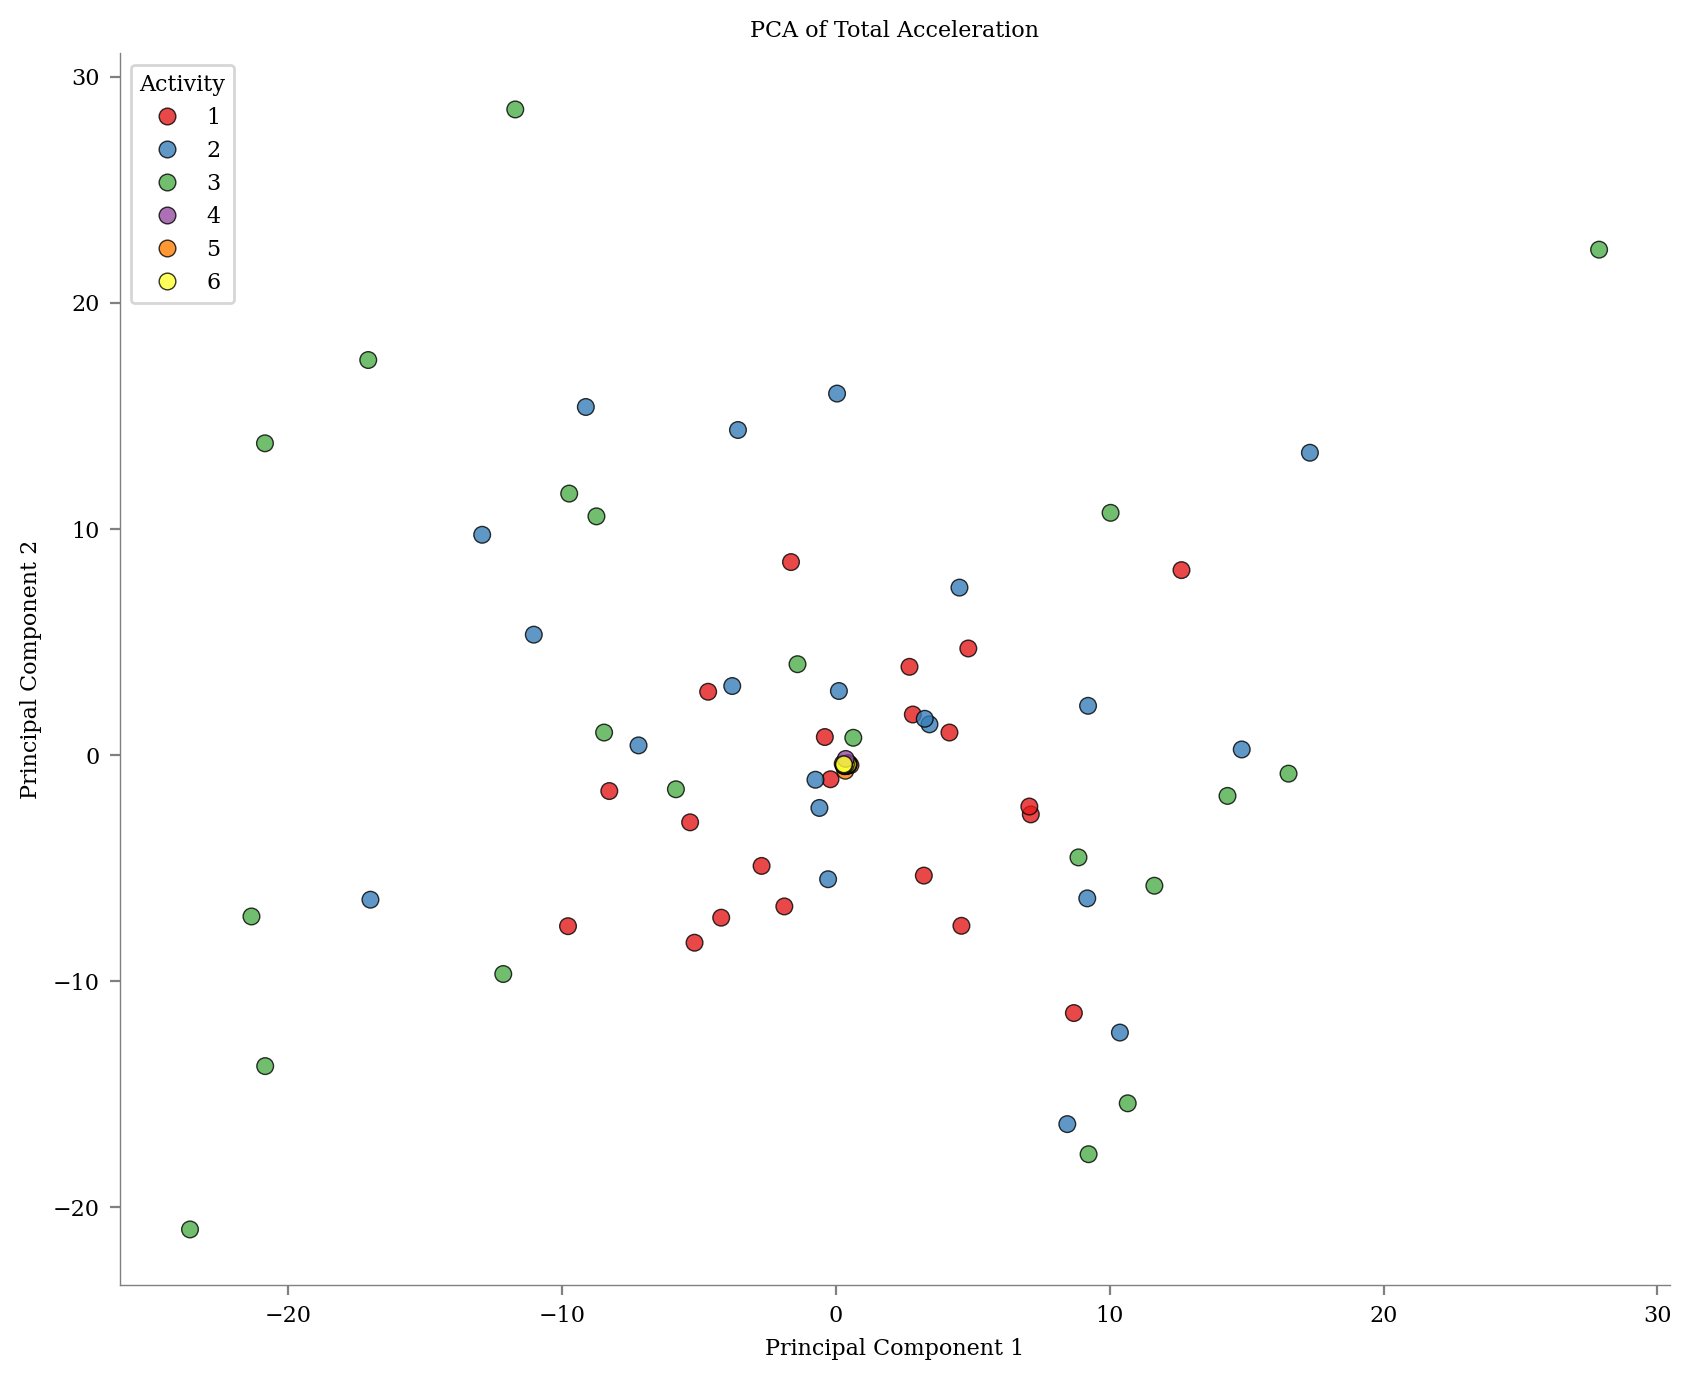

In [12]:
latexify()
plt.figure(figsize=(10, 8))
format_axes(plt.gca())

sns.scatterplot(data=pca_df_1, x='PC1', y='PC2', hue='Activity', palette='Set1', alpha = 0.8, edgecolor = 'black', linewidth = 0.5) 
plt.title('PCA of Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')

plt.show()

 - #### Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [13]:
# Initializing TSFEL feature configuration
cfg = tsfel.get_features_by_domain() # Choosing all statistical, temporal and spectral features

# List to hold DataFrames for all samples
tsfel_features_list = []

for sample in X_train:
    # Each sample is a time series with shape (500, 3)
    sample_features = tsfel.time_series_features_extractor(cfg, sample, verbose=0)
    tsfel_features_list.append(sample_features)

# Concatenating all the individual sample feature DataFrames into one DataFrame
tsfel_features_df = pd.concat(tsfel_features_list, axis=0, ignore_index=True)

In [14]:
print("This is how the extracted features looks like:")
tsfel_features_df

This is how the extracted features looks like:


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,2_Wavelet variance_0,2_Wavelet variance_1,2_Wavelet variance_2,2_Wavelet variance_3,2_Wavelet variance_4,2_Wavelet variance_5,2_Wavelet variance_6,2_Wavelet variance_7,2_Wavelet variance_8,2_Zero crossing rate
0,428.119592,4.504459,5.0,85.795509,2.502542,100.0,400.0,0.737727,1.086936,0.002,...,0.003322,0.019687,0.049441,0.092600,0.146952,0.206732,0.257520,0.283238,0.278961,0.0
1,32.768542,1.276929,26.0,6.566842,2.477941,100.0,400.0,0.249165,0.262091,0.002,...,0.000828,0.002949,0.006456,0.011349,0.017532,0.024986,0.033706,0.043662,0.054780,0.0
2,478.627177,4.882182,5.0,95.917270,2.494835,100.0,400.0,0.975656,0.980947,0.002,...,0.000127,0.000487,0.001049,0.001795,0.002722,0.003826,0.005097,0.006514,0.008064,0.0
3,477.002571,4.747669,5.0,95.591698,2.505107,100.0,400.0,0.762545,1.075617,0.002,...,0.002664,0.013335,0.032745,0.056265,0.077145,0.097067,0.119095,0.141653,0.162081,2.0
4,530.466450,5.002581,6.0,106.305902,2.498989,100.0,400.0,0.770530,1.234635,0.002,...,0.002535,0.015177,0.040367,0.069588,0.099245,0.131172,0.159307,0.173780,0.171967,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,497.739114,4.877595,3.0,99.747317,2.472182,100.0,400.0,0.784800,1.202131,0.002,...,0.009342,0.034796,0.057884,0.100034,0.153607,0.202996,0.225477,0.211677,0.172606,10.0
122,340.897228,4.103581,84.0,68.316078,2.297769,100.0,400.0,0.776342,0.926267,0.002,...,0.000305,0.001307,0.003269,0.006416,0.010984,0.016855,0.023610,0.030696,0.037616,0.0
123,17.727040,0.939261,43.0,3.552513,2.506691,100.0,400.0,0.183463,0.192260,0.002,...,0.001052,0.003667,0.007924,0.013976,0.021732,0.031070,0.041836,0.053900,0.067207,0.0
124,430.187347,4.514342,5.0,86.209889,2.457373,100.0,400.0,0.732451,1.062091,0.002,...,0.004605,0.020702,0.042012,0.073398,0.119603,0.177105,0.233516,0.276743,0.303233,8.0


In [15]:
print("Shape of the data after extracting all features using tsfel", tsfel_features_df.shape)

Shape of the data after extracting all features using tsfel (126, 1152)


In [16]:
def remove_redundant_features(data, corr_threshold, var_threshold):
    # Removing highly correlated columns
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    data_reduced = data.drop(columns=to_drop)

    # Removing features with low variance, they might not carry useful information
    selector = VarianceThreshold(threshold=var_threshold)
    data_reduced_final = pd.DataFrame(selector.fit_transform(data_reduced))
    
    print(f"Shape of the data after removing redundant features: {data_reduced_final.shape}")
    return data_reduced_final

In [17]:
tsfel_features_df_reduced = remove_redundant_features(tsfel_features_df, corr_threshold=0.95, var_threshold=0.01)

Shape of the data after removing redundant features: (126, 143)


In [18]:
scaler_2 = StandardScaler()
tsfel_df_scaled = scaler_2.fit_transform(tsfel_features_df_reduced)

# Performing PCA on the features extracted by TSFEL
pca_2 = PCA(n_components=2)
principal_components_2 = pca_2.fit_transform(tsfel_df_scaled)
pca_df_2 = pd.DataFrame(data=principal_components_2, columns=['PC1', 'PC2'])
pca_df_2 = pd.concat([pca_df_2, pd.Series(y_train, name="Activity")], axis=1)

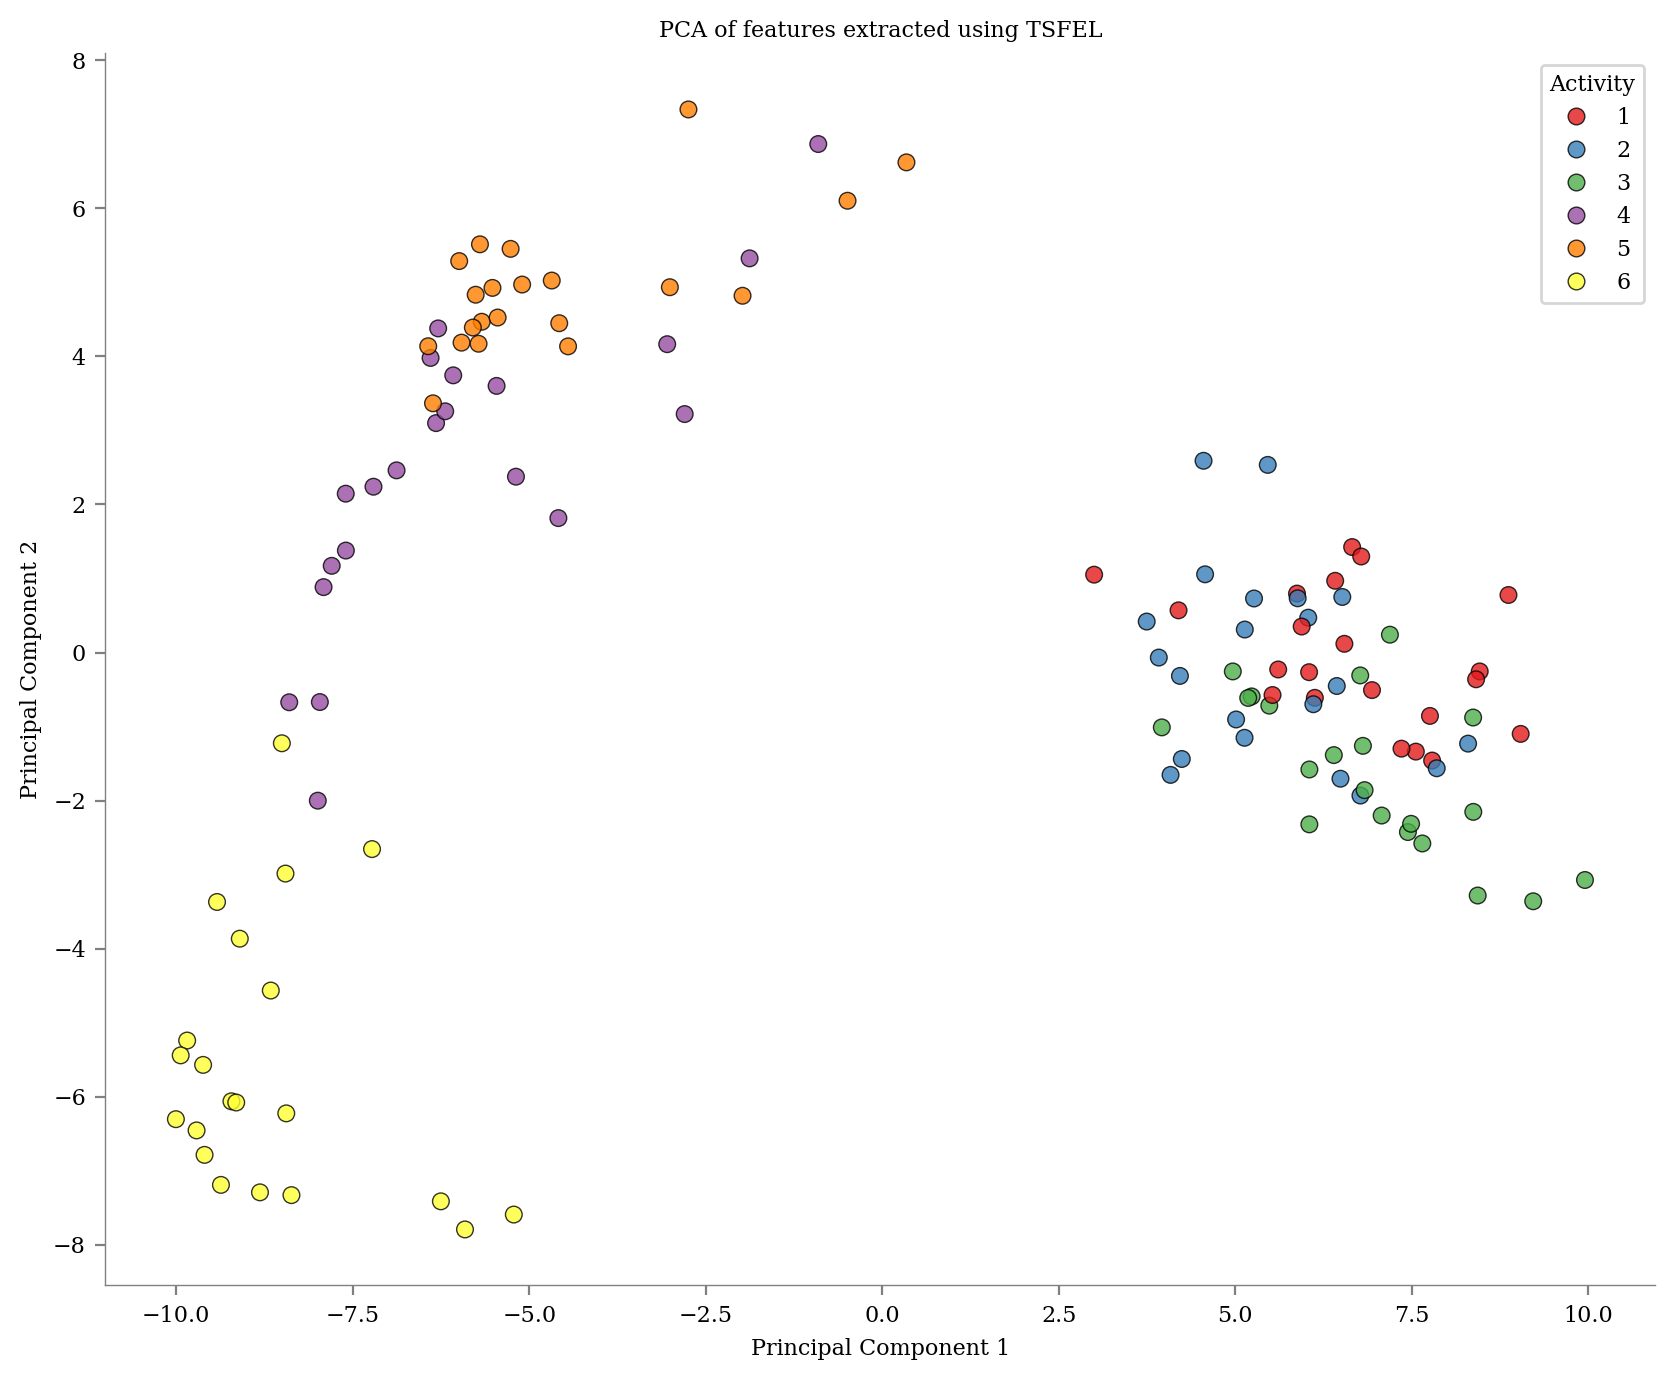

In [19]:
latexify()
plt.figure(figsize=(10, 8))
format_axes(plt.gca())

sns.scatterplot(data=pca_df_2, x='PC1', y='PC2', hue='Activity', palette='Set1', alpha = 0.8, edgecolor = 'black', linewidth = 0.5)

plt.title('PCA of features extracted using TSFEL')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')

plt.show()


- #### Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [21]:
# Loading the feature names
feature_names = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
feature_names_list = feature_names[1].tolist()

# Handling duplicate column names
feature_names_renamed = pd.Series(feature_names_list)
duplicates = feature_names_renamed[feature_names_renamed.duplicated()].unique()

for dup in duplicates:
    dup_indices = feature_names_renamed[feature_names_renamed == dup].index
    for i, idx in enumerate(dup_indices):
        feature_names_renamed[idx] = f"{dup}.{i+1}"

In [22]:
# Load the training and testing data using renamed feature names
X_train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None, names=feature_names_renamed)
y_train_data = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['Activity'])

X_test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None, names=feature_names_renamed)
y_test_data = pd.read_csv('UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['Activity'])

In [23]:
print(f"X_train_data shape: {X_train_data.shape}")
print(f"y_train_data shape: {y_train_data.shape}")
print(f"X_test_data shape: {X_test_data.shape}")
print(f"y_test_data shape: {y_test_data.shape}")

X_train_data shape: (7352, 561)
y_train_data shape: (7352, 1)
X_test_data shape: (2947, 561)
y_test_data shape: (2947, 1)


In [24]:
# Performing PCA on the features provided by the dataset
pca_3 = PCA(n_components=2)
principal_components_3 = pca_3.fit_transform(X_train_data)

pca_df_3 = pd.DataFrame(data=principal_components_3, columns=['PC1', 'PC2'])
pca_df_3 = pd.concat([pca_df_3, y_train_data], axis=1)

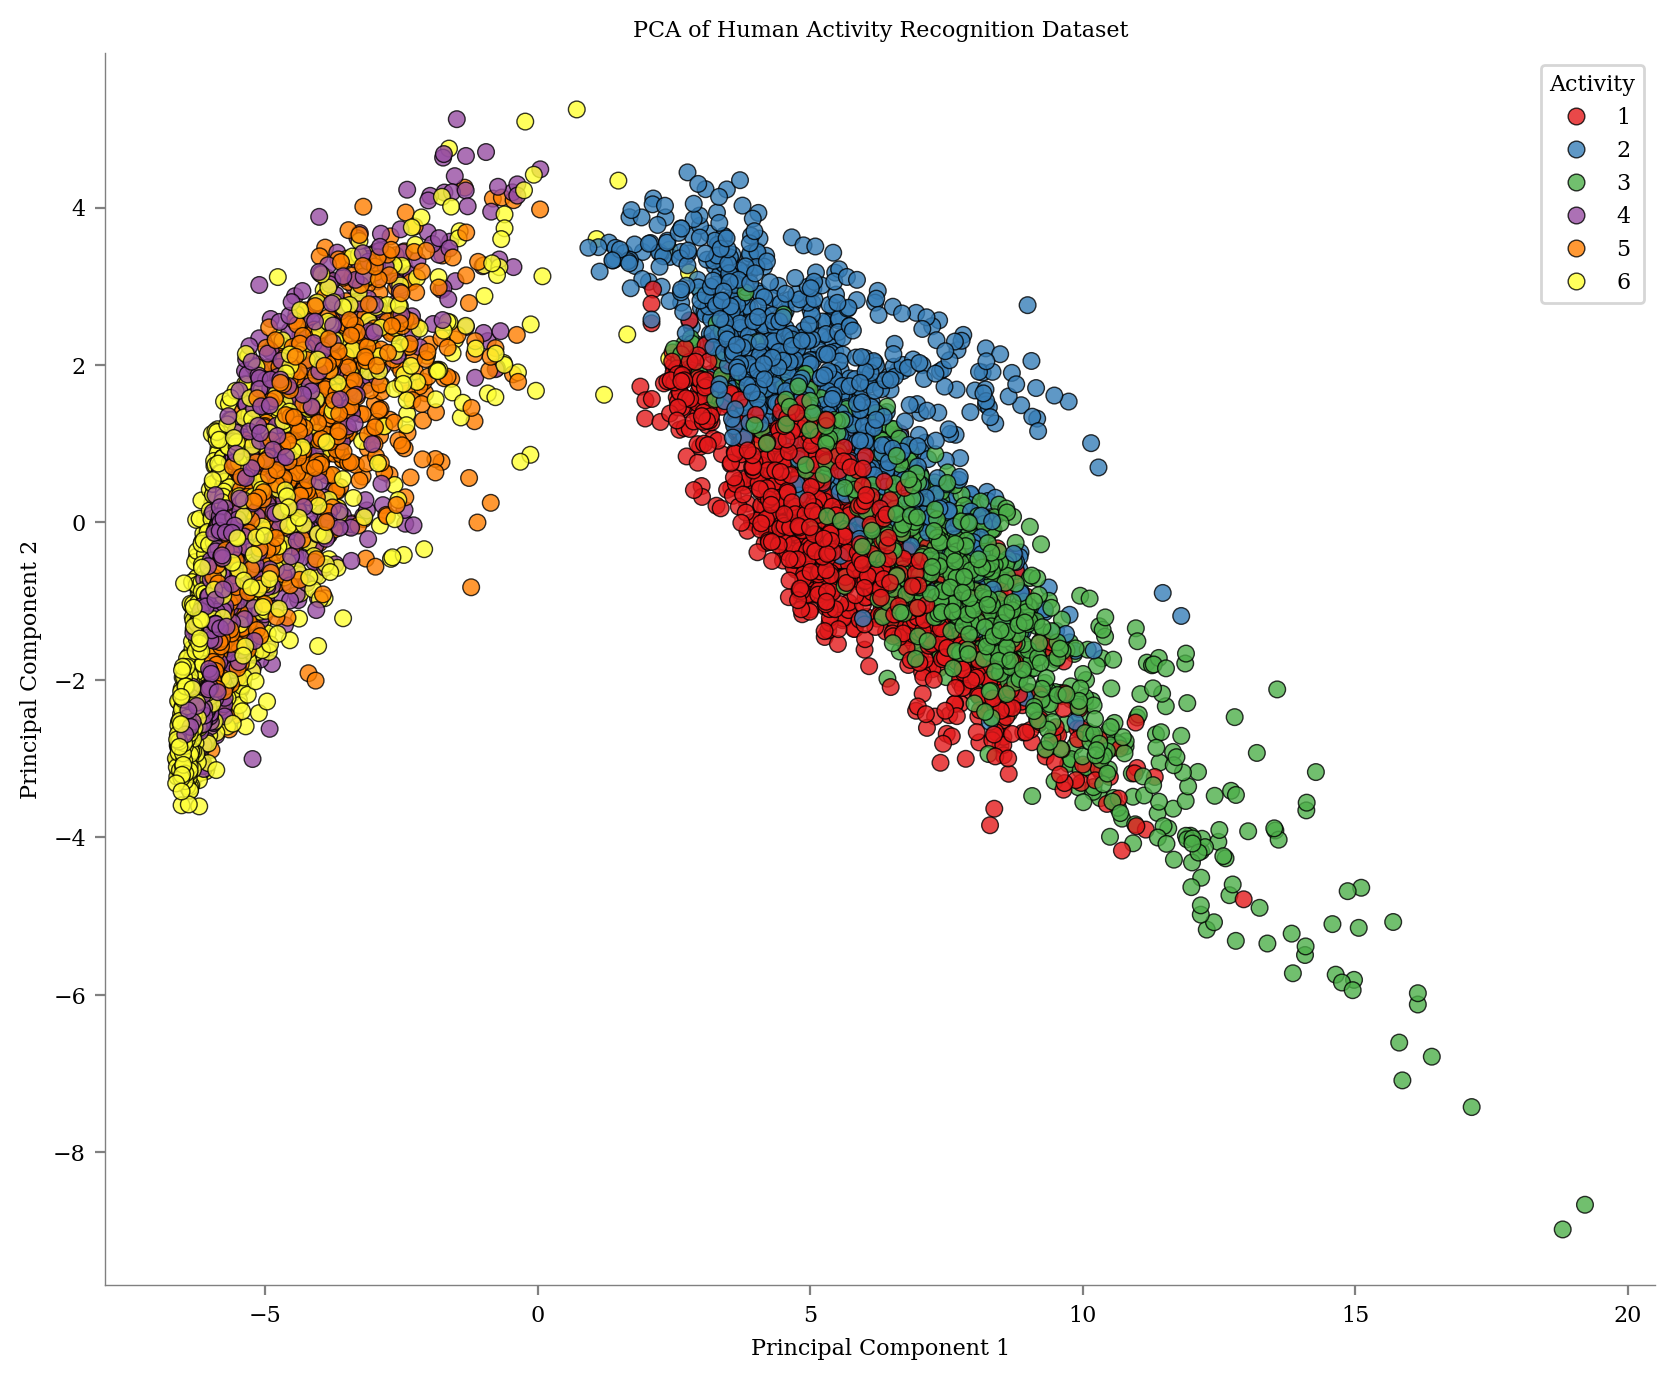

In [25]:
latexify()
plt.figure(figsize=(10, 8))
format_axes(plt.gca())
sns.scatterplot(data=pca_df_3, x='PC1', y='PC2', hue='Activity', palette='Set1', alpha = 0.8, edgecolor = 'black', linewidth = 0.5)

plt.title('PCA of Human Activity Recognition Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')

plt.show()


### Comparison of PCA Methods:

1. **PCA on Total Acceleration:**
   - This method is the least effective for visualization. Using total raw acceleration data lead to to overlapping clusters, as the data lacks sufficient distinguishing features. As a result, activities with similar movement patterns are hard to separate visually.

2. **PCA on TSFEL Extracted Features:**
   - This method provides the most effective visualization. TSFEL extracts a diverse set of features from the data, which improves the separation between different activities. The PCA plot using TSFEL features displays clearer and more distinct clusters, making it easier to interpret the data.

3. **PCA on Provided Dataset Features:**
   - This approach is more effective thtotalusing raw acceleration data but does not achieve the same level of separation as TSFEL features. While it improves cluster di compared to total acceleration raw data, there is still some overlap among activities.

**Best Method:** **PCA on TSFEL Extracted Features** is the most effective method for visualizing the data. The richness and variety of features captured by TSFEL enhance the separability of activities, resulting in clearer and more interpretable PCA plots comparetotal accelerationo using raw data or dataset features alone.approaches.approaches.

# Question 4
#### Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

Correlation matrix of the features obtained by tsfel :

In [26]:
TSFEL_corr = tsfel_features_df.corr()
TSFEL_corr

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,2_Wavelet variance_0,2_Wavelet variance_1,2_Wavelet variance_2,2_Wavelet variance_3,2_Wavelet variance_4,2_Wavelet variance_5,2_Wavelet variance_6,2_Wavelet variance_7,2_Wavelet variance_8,2_Zero crossing rate
0_Absolute energy,1.000000,0.983795,-0.264541,1.000000,0.164905,NaN,NaN,0.876788,0.972869,NaN,...,0.345805,0.337745,0.321384,0.292348,0.271467,0.258657,0.250138,0.240642,0.223981,0.468866
0_Area under the curve,0.983795,1.000000,-0.209707,0.983795,0.188140,NaN,NaN,0.930703,0.955381,NaN,...,0.275828,0.275300,0.263659,0.244440,0.231504,0.223288,0.216489,0.206371,0.187596,0.376123
0_Autocorrelation,-0.264541,-0.209707,1.000000,-0.264541,-0.250115,NaN,NaN,-0.168205,-0.244005,NaN,...,-0.202415,-0.202285,-0.203462,-0.197199,-0.192017,-0.189271,-0.188815,-0.188071,-0.182592,-0.238780
0_Average power,1.000000,0.983795,-0.264541,1.000000,0.164905,NaN,NaN,0.876788,0.972869,NaN,...,0.345805,0.337745,0.321384,0.292348,0.271467,0.258657,0.250138,0.240642,0.223981,0.468866
0_Centroid,0.164905,0.188140,-0.250115,0.164905,1.000000,NaN,NaN,0.171760,0.157979,NaN,...,0.056745,0.056844,0.061027,0.062885,0.062050,0.061713,0.063024,0.064724,0.064801,0.046532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_Wavelet variance_5,0.258657,0.223288,-0.189271,0.258657,0.061713,NaN,NaN,0.023610,0.357024,NaN,...,0.614382,0.717531,0.859823,0.955517,0.992761,1.000000,0.993195,0.963140,0.888644,0.215177
2_Wavelet variance_6,0.250138,0.216489,-0.188815,0.250138,0.063024,NaN,NaN,0.015469,0.350563,NaN,...,0.587850,0.684352,0.826038,0.928373,0.975069,0.993195,1.000000,0.987182,0.932467,0.205033
2_Wavelet variance_7,0.240642,0.206371,-0.188071,0.240642,0.064724,NaN,NaN,0.000259,0.342778,NaN,...,0.558526,0.644431,0.783368,0.884874,0.935287,0.963140,0.987182,1.000000,0.977729,0.211060
2_Wavelet variance_8,0.223981,0.187596,-0.182592,0.223981,0.064801,NaN,NaN,-0.022849,0.325667,NaN,...,0.508801,0.576700,0.707341,0.801309,0.851650,0.888644,0.932467,0.977729,1.000000,0.229717


Correlation matrix of features provided in the dataset:

In [27]:
Dataset_corr = X_train_data.corr()
Dataset_corr

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.037444,0.017967,-0.063609,0.018985,-0.008507,-0.018429,0.019389,-0.012546,-0.023525,0.025066,...,-0.026615,0.034514,0.024553,-0.006269,0.009141,1.000000,-0.116001,-0.005853,-0.012313,-0.019903
"angle(tBodyGyroJerkMean,gravityMean)",0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,0.000102,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,0.087332,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655
"angle(Y,gravityMean)",0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,-0.100125,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885


In [28]:
def redundant_features(corr_matrix,corr_threshold):
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    return to_drop

In [29]:
TSFEL_redundant = redundant_features(TSFEL_corr,corr_threshold = 0.95)

In [30]:
print(f"A total of {len(TSFEL_redundant)} features obtained by TSFEL are highly correlated with each other:\n")
for feature in TSFEL_redundant:
    print(f"- {feature}")

A total of 303 features obtained by TSFEL are highly correlated with each other:

- 0_Area under the curve
- 0_Average power
- 0_ECDF Percentile_1
- 0_FFT mean coefficient_211
- 0_FFT mean coefficient_212
- 0_FFT mean coefficient_214
- 0_FFT mean coefficient_215
- 0_FFT mean coefficient_216
- 0_FFT mean coefficient_218
- 0_FFT mean coefficient_219
- 0_FFT mean coefficient_220
- 0_FFT mean coefficient_221
- 0_FFT mean coefficient_222
- 0_FFT mean coefficient_223
- 0_FFT mean coefficient_224
- 0_FFT mean coefficient_225
- 0_FFT mean coefficient_226
- 0_FFT mean coefficient_227
- 0_FFT mean coefficient_228
- 0_FFT mean coefficient_229
- 0_FFT mean coefficient_23
- 0_FFT mean coefficient_230
- 0_FFT mean coefficient_231
- 0_FFT mean coefficient_232
- 0_FFT mean coefficient_233
- 0_FFT mean coefficient_234
- 0_FFT mean coefficient_235
- 0_FFT mean coefficient_236
- 0_FFT mean coefficient_237
- 0_FFT mean coefficient_238
- 0_FFT mean coefficient_239
- 0_FFT mean coefficient_240
- 0_FFT mean 

In [31]:
Dataset_redundant = redundant_features(Dataset_corr, corr_threshold = 0.95)

In [32]:
print(f"A total of {len(TSFEL_redundant)} features provided in the dataset are highly correlated with each other:\n")
for feature in Dataset_redundant:
    print(f"- {feature}")

A total of 303 features provided in the dataset are highly correlated with each other:

- tBodyAcc-mad()-X
- tBodyAcc-mad()-Y
- tBodyAcc-mad()-Z
- tBodyAcc-max()-X
- tBodyAcc-max()-Y
- tBodyAcc-sma()
- tBodyAcc-energy()-X
- tBodyAcc-iqr()-X
- tBodyAcc-iqr()-Y
- tBodyAcc-iqr()-Z
- tGravityAcc-mad()-X
- tGravityAcc-mad()-Y
- tGravityAcc-mad()-Z
- tGravityAcc-max()-X
- tGravityAcc-max()-Y
- tGravityAcc-max()-Z
- tGravityAcc-min()-X
- tGravityAcc-min()-Y
- tGravityAcc-min()-Z
- tGravityAcc-energy()-X
- tGravityAcc-iqr()-X
- tGravityAcc-iqr()-Y
- tGravityAcc-iqr()-Z
- tGravityAcc-arCoeff()-X,3
- tGravityAcc-arCoeff()-X,4
- tGravityAcc-arCoeff()-Y,3
- tGravityAcc-arCoeff()-Y,4
- tGravityAcc-arCoeff()-Z,3
- tGravityAcc-arCoeff()-Z,4
- tBodyAccJerk-std()-X
- tBodyAccJerk-std()-Y
- tBodyAccJerk-mad()-X
- tBodyAccJerk-mad()-Y
- tBodyAccJerk-mad()-Z
- tBodyAccJerk-max()-X
- tBodyAccJerk-max()-Y
- tBodyAccJerk-max()-Z
- tBodyAccJerk-sma()
- tBodyAccJerk-energy()-Y
- tBodyAccJerk-iqr()-X
- tBodyAcc

There are about 303 highly correlated features in both the TSFEL-extracted features and those provided by the dataset. While highly correlated features often suggest redundancy, this is not always the case.

For example, High correlation between tBodyAcc-mad()-X, tBodyAcc-mad()-Y, and tBodyAcc-mad()-Z does not automatically imply redundancy. Each feature contains information about movement along a specific axis, which can be important for accurately recognizing different activities.s.